<h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2023-2024 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 12 </h1>
<h1><center>  Advanced Web Scraping:  </h1>
<h1><center>  Crawling, Forms, Headers e Cookies </h1>  
<h1><center> 20 Marzo 2024 </h1>

## Crawling: Gaming by scraping

* esempio di scraping pubblicato in https://www.geeksforgeeks.org/quote-guessing-game-using-web-scraping-in-python/

* a "guessing game" effettuato con il supporto di uno scraper

* il gioco utilizza informazione reperite sul sito https://quotes.toscrape.com/
    * il sito pubblica frasi pronuciate da personaggi celebri
    
* il gioco è il seguente
    * viene proposta all'utente una frase celebre (**quote**), senza svelarne l'autore
    * vengono date k possibilità  di indovinare chi è l'autore della frase
    * ad ogni round, viene dato un nuovo suggerimento all'utente, nell'ordine:
        * la data di nascita e il luogo di nascita dell'autore
        * la prima lettera del nome dell'autore
        * l'ultima lettera del nome dell'autore
    * viene indicato all'utente se ha indovinato, oppure dopo tutti k tentativi senza successo, viene comunicata la sconfitta

## Crawling: Gaming by scraping

<center>
<img src="Figures/Quotes.jpg" style="width:900px;height:700px;"/>

## Crawling: Gaming by scraping

* in fondo alla pagina il bottone **next** per passare alla pagina successiva

<center>
<img src="Figures/Quotesinspect2.jpg" style="width:1000px;height:600px;"/>

## Prima fase: reperimento contenuti via scraping

* ricercare nella pagina tutte le "quotes" (frasi celebri)
* memorizzare le informazioni relative in una lista **Python**
* memorizzare per ogni frase le informazioni utili per fornire i suggerimenti 
    * il testo
    * l'autore
    * la bibliografia dell'autore
* queste informazioni servono per implementare il gioco
    * mostrare il testo
    * dare i suggerimenti al giocatore

## Ispezionare il codice HTML di Quotes.toScrape

<center>
<img src="Figures/Quotesinspect1.jpg" style="width:1000px;height:600px;"/>

## Individuare nella pagina frasi e tag associati

* scorrendo la pagina, si osserva che 
    * le **quotes** sono individuate dalla class **quote**
* all'interno dellla **class quote** esiste
    * una class **text** che individua il testo della "quote"
    * una class **author** che individua l'autore della "quote"
    * una class **tags** che individua i tag  associati alla "quote"
    

<center>
<img src="Figures/Quotesinspect3.jpg" style="width:1200px;height:500px;"/>

## Importare le librerie e preparare la url

* la **url** è composta da due parti diverse
    * una parte fissa
    * una parte variabile

In [1]:
import requests
from bs4 import BeautifulSoup
from csv import writer
from time import sleep
from random import choice
 # la lista in cui memorizzeremo tutte le quote
all_quotes = []
 # questa parte della URL rimane fissa
base_url = "http://quotes.toscrape.com/"
 # questa parte della url indica la pagina visitata, all'inizio la prima pagina
# il numero di pagina verrà incrementato mano a mano che il codice scorrerà le pagine
url = "/page/1"


## Collezionare le quotes in una lista

In [2]:
while url:   
    # concateniamo la url base con la url di pagina e effettuiamo la richiesta
    # costruzione di una stringa con i valori di due variabili   
    res = requests.get(f"{base_url}{url}")
    print(f"Now Scraping{base_url}{url}")   
    soup = BeautifulSoup(res.text, "html.parser")
    # estraiamo le "quotes" da questa pagina
    quotes = soup.find_all('div', class_="quote")
    for quote in quotes:
        all_quotes.append({
            "text": quote.find(class_="text").get_text(),
            "author": quote.find(class_="author").get_text(),
            "bio-link": quote.find("a")["href"]
        })
    next_btn = soup.find(class_="next")
    url = next_btn.find("a")["href"] if next_btn else None
print(len(all_quotes))
print(all_quotes[1])


Now Scrapinghttp://quotes.toscrape.com//page/1
Now Scrapinghttp://quotes.toscrape.com//page/2/
Now Scrapinghttp://quotes.toscrape.com//page/3/
Now Scrapinghttp://quotes.toscrape.com//page/4/
Now Scrapinghttp://quotes.toscrape.com//page/5/
Now Scrapinghttp://quotes.toscrape.com//page/6/
Now Scrapinghttp://quotes.toscrape.com//page/7/
Now Scrapinghttp://quotes.toscrape.com//page/8/
Now Scrapinghttp://quotes.toscrape.com//page/9/
Now Scrapinghttp://quotes.toscrape.com//page/10/
100
{'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'author': 'J.K. Rowling', 'bio-link': '/author/J-K-Rowling'}


## Collezionare le quotes in una lista: osservazioni sul codice

* si individuano tutti gli elementi con tag=**div** e con **classe=quotes** sono **quotes** con una **find_all**
     <code>
     quotes = soup.find_all('div', class_="quote")
     </code>
* si analizza ogni elemento restituito, e le sue proprietà, inserendole in una lista (Python)
    <code>
    "text": quote.find(class_="text").get_text(),
    "author": quote.find(class_="author").get_text(),
    "bio-link": quote.find("a")["href"]
     </code>
* dopo aver effettuato lo scraping di una pagina, si passa alla pagina successiva, ricercando  il bottone in fondo alla pagina e individuando il link associato al bottone
     <code>
     next_btn = soup.find(class_="next") 
     url = next_btn.find("a")["href"]
     </code>
* segue il link se diverso da **None**, altrimenti esce dal while, tutte le pagine sono state visitate 
* la struttura dati costruita è una lista di dictionaries

## Collezionare le quotes in una lista: osservazioni sul codice

<code>
from random import choice
quote = choice(all_quotes)
</code>

* il metodo **choice()** restituisce un elemento scelto in modo casuale da una sequenza
* la sequenza può essere una stringa, una lista, una tupla o qualsasi tipo di sequenza
* nel nostro caso restituisce un elmento della lista,la lista che include tutte le quotes
* l'elemento è un **dictionary**

## Fase di gioco

In [ ]:
quote = choice(all_quotes)
remaining_guesses = 4
print("Here's a quote:  ")
print(quote["text"])
guess = ''
while guess.lower() != quote["author"].lower() and remaining_guesses > 0:
    guess = input(f"Who said this quote? Guesses remaining {remaining_guesses}")     
    if guess == quote["author"]:
        print("CONGRATULATIONS!!! YOU GOT IT RIGHT")
        break
    remaining_guesses -= 1    
    if remaining_guesses == 3:
        res = requests.get(f"{base_url}{quote['bio-link']}")
        soup = BeautifulSoup(res.text, "html.parser")
        birth_date = soup.find(class_="author-born-date").get_text()
        birth_place = soup.find(class_="author-born-location").get_text()
        print(
            f"Here's a hint: The author was born on {birth_date}{birth_place}")   
    elif remaining_guesses == 2:
        print(f"Here's a hint: The author's first name starts with: {quote['author'][0]}")    
    elif remaining_guesses == 1:
        last_initial = quote["author"].split(" ")[1][0]
        print(f"Here's a hint: The author's last name starts with: {last_initial}")
    else:
        print(f"Sorry, you ran out of guesses. The answer was {quote['author']}")
        

## Strumenti avanzati per il web scraping

* cosa abbiamo visto nelle lezioni precedenti
    * **HTTP**, **HTML**, **CSS**
* le tecniche viste possono essere utilizzate sotto certe condizioni
    * la pagina **HTML** che cerchiamo è accessibile senza autenticazione
    * il contenuto della pagina è **statico**
    * il server non utilizza misure anti-scraping.
* cosa manca per implementare un vero web-scraper?
    * gestione di web forms per siti che richiedono autenticazione
    * gestione di cookies
    * capire le misure opportune affinchè lo scraper "**looks like a human**"
    * gestire il contenuto dinamico generato da **JavaScript**
* alcune di queste tecniche possono essere implementate direttamente in **BeautifulSoup**
* la gestione di contenuti gestiti da **Java Script** richiede strumenti più avanzati, come **Selenium**
    

## Interagire con il web server: la libreria Python Request


* interagire con il protocollo **HTTP** da **Python** tramite la libreria **Request**
* cosa abbiamo visto fino nelle lezioni precedenti: il metodo **GET** della libreria **Requests**
* la libreria, come vedremo, offre molte altre funzionalità
  * possibilità di sottomettere **form** al server mediante **POST**
  * gestione degli header **HTTP**
  * gestione dei **cookies**
       

## Interagire con il web server con la libreria Python Request: recap

In [1]:
import requests
url = 'https://www.google.com'
r = requests.get(url)
# Qual è il codice HTTP restituito da HTML?
print(r.status_code)
# Qual è la spiegazione testuale di quel codice?
print(r.reason)
# Quali sono i campi header contenuti nella risposta inviata dal server?
print(r.headers)
# Che tipo ha "r.request", cioè la richiesta inviata al server?
print(r.request)
# Quali erano gli header HTTP della richiesta?
print(r.request.headers)
# Il contenuto della risposta HTTP:
print(r.text)

200
OK
{'Date': 'Wed, 20 Mar 2024 14:12:58 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-Ungs7KBR8E4F1whj1Edxkw' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': 'SOCS=CAAaBgiAzuivBg; expires=Sat, 19-Apr-2025 14:12:58 GMT; path=/; domain=.google.com; Secure; SameSite=lax, AEC=Ae3NU9O9PD-xvNcNMOspLY3_Qxgb-oEudKYLe5Y4Uosz8WXwAfAoSAwc4qM; expires=Mon, 16-Sep-2024 14:12:58 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, __Secure-ENID=18.SE=fB3CKZnIvsN_VnidGBNw068gnTcqrhMlsqwUEp6pGyDPX4gI9lFhLlLWA3suHwRWmWVOfqk3lDJvnGg8mogcNnYxPwISKzvJsttvDsv7sFxiJ7QM

## Interagire con un web server: query strings

* **HTTP** consente non solo di scaricare contenuti dal server, ma anche di interagire con il server inviandogli dei dati

* il modo più semplice per inviare i dati a un server è includere i dati direttamente nella **URL**

* **query strings**: parte opzionale della **URL** inserita dopo il **?**
    
    <code>
    http://www.example.com/product_page.html?product_id=304
    </code>
    
     <code>
    https://www.google.com/search?dcr=0&source=hp&q=test&oq=test
    </code>

* quando il server riceve una richiesta **HTTP** con una query string, è in grado di "interpretare i parametri" ed effettuare le operazioni corrispondenti
    
* di seguito presentaimo due modi diversi per accedere agli episodi di **Game of Thrones**, nel secondo si sottomette una query

    
   [WikiGameOfThrones](https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes) 
   <code>    
   https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes: 
   </code>
    
   [WikiGameOfThroneswithQuery](https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes)
   <code>
   https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes 
   </code> 

## E se un sito richiede il login?

* alcuni siti richiedono semplicemente di inviare username e password
* altri siti hanno metodi di autenticazione più complessi
    * Client-side validations
    * **CSRF** tokens
    * Web Application Firewalls (WAFs)
* inziamo ad analizzare il metodo con **username** e **password**


## E se un sito richiede il login?

<center>
<img src="Figures/LoginForm.jpg" style="width:1200px;height:800px;"/>
</center>

## Web Form

<center>
<img src="Figures/HTMLForm.jpg" style="width:1000px;height:1000px;"/>
</center>

## Web Form

* anche se la dimensione di una **URL** è illimitata, inviare parametri tramite una **URL** diventa difficile, quando le query diventano più complesse
    * ad esempio: comprare tickets per un concerto,  invinado nome, e-mail, scelta del ticket, etc.
* in questo caso si possono usare le **web forms**
     * utilizzate per fornire valori in input ed inviarli ad un browser
        * login form
        * newsletter sign up
        * "buy ticket" form

* una **HTML Form (Web Form)** permette l'interazione tra l'utente e il browser web
    * è incorporata nella pagina **HTML** mediante i tag 
    <code>
    &lt;form> 
    &lt;/form>
    </code>

* all'interno della form si possono trovare diversi attributi che rappresentano i campi della form
    * \<input\> tag con attributo type che indica il tipo di campo di input
    * text field, password, buttons, checkboxes, radio boxes, hidden fields
  

## Web Form: attributi

* **method**
    * specifica il metodo **HTTP**  usato per la sottomissione dei dati immessi dall'utente
    * default method **GET**
    * se settato a **POST** il browser esegue una **HTTP POST** per inviare i dati, invece di inserire i dati nell **URL** (metodo **GET**)
  <code>
    &lt;form method="post"> 
    &lt;/form>
    </code>
    
    * viene inviata una richiesta **HTTP POST**
        * il valore dei parametri viene incluso nel body della richiesta, invece di includere il valore dei parametri nella **URL** di un metodo **GET**
* **action**
    * indica la **URL** dove i dati verranno mandati e manipolati una volta che il contenuto del form verrà inviato.
     

## Usare gli  Strumenti per sviluppatori del browser

* in alternativa usare il tab **Strumenti per sviluppatori** di Chrome per monitorare cosa accade quando si sottomette la **form**
* usare **test** come username e password
* premere il bottone **login** e controllare la richiesta che il browser invia al server
* la sottomissione della **form** genera una richiesta **POST** alla pagina individuata
    * il server risponde con un **cookie** e permette l'accesso alla pagina protetta


## Usare gli  Strumenti per sviluppatori del browser

<center>
<img src="Figures/intestazioni.jpg" style="width:1200px;height:1000px;"/>
</center>

* tab **intestazione**: indica che la richiesta è una **POST**

## Usare gli  Strumenti per sviluppatori del browser

<center>
<img src="Figures/payload.jpg" style="width:1400px;height:600px;"/>
</center>

## Pagina acceduta dopo il login

<center>
<img src="Figures/AfterLogin.jpg" style="width:1000px;height:800px;"/>
</center>

## Scraping di pagine web con forms

In [3]:
from bs4 import BeautifulSoup as bs 
import requests 
URL = "http://testphp.vulnweb.com/userinfo.php" 
payload = { 
 "uname": "test", 
 "pass": "test" 
} 
response = requests.get(URL)
response = requests.post(URL, data=payload) 
print(response.status_code) # If the request went Ok we usually get a 200 status. 
from bs4 import BeautifulSoup 
soup = BeautifulSoup(response.content, "html.parser") 
protected_content = soup.find(attrs={"id": "pageName"}).text 
print(protected_content)


200
Smith (test)


* metodo **POST** della libreria *Request**
* dizionario che rappresenta coppie nome, valore


## HTTP headers and cookies for web scraping

* il problema principale che si rileva nel fare scraping è il fatto che si è spesso **bloccati** dal server
    * diverse strategie anti-bot
    * server più o meno "intelligenti": molti usano tool e strategie per identificare i bot e bloccarli
        * per evitare il rallentamento del funzionamento del server o addirittura una interruzione del servizio
* alcune contromisure: uso intelligente di
    * **HTTP headers**
        * campi della richiesta o nella risposta **HTTP** utilizzati per passare metadati e "contesto" relativi alla richiesta
        * definiti come coppie **(name: value)**
    * **cookies**
   

## HTTP headers for web scraping

* un uso accurato degli header HTTP e dei cookies può diminuire la probabilità di essere bloccati
* il client invia una serie di **HTTP headers** nelle richieste al server
* il server può utilizzare questa informazione per individuare i bot
* un uso accurato degli **header** utilizzati nella richiesta inviata dal bot (il nostro scraper) può diminuire la probabilità 
di essere **blacklistati** o addirittura **bloccati** 
* utilizzando la libreria **requests**, gli header vengono generati automaticamente dalla libreria stessa, ma è possibile modificarli

## HTTP headers: User-agent

* l'header più importante
* identifica l'applicazione/sistema operativo/software version dell'agente che richiede la connessione
* il primo controllo effettuato dai server
    * bloccare applicazioni non standard
* ad esempio se la richiesta viene generata usando la libreria **Request** di **Python**, l'header generato è il seguente

In [4]:
import requests
url= "http://google.com"
r = requests.get(url)
print(r.request.headers)


{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


* facile individuare che la richiesta non viene da un brwoser!
* se il server prevede qualche meccanismo di **anti-scraping**, può inserire un semplice controllo per verificare che il richiedente non è un browser e bloccare l'accesso
    * occorre modificare l'header nello script di scraping.

## HTTP headers: looking like a human!

In [5]:
import requests

url =  "http://google.com"
my_headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' + ' (KHTML, like Gecko) Chrome/61.0.3163.100Safari/537.36'}
r = requests.get(url, headers=my_headers)
print(r.request.headers)


{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36  (KHTML, like Gecko) Chrome/61.0.3163.100Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'AEC=Ae3NU9NwQ1BcD0SQNr-TqWAxAzWOr4mbaPA84wIm-cCoE8y7PnsgVb_9qXE'}


* impostare un header in modo da comportarsi come un browser

## Referral (o Referer) header

* un header HTTP  che identifica la **URL** della pagina web che punta alla risorsa che viene richiesta
* quando l'utente clicca su un link (o anche carica una immagine o uno script), il browser tipicamente setta nella richiesta il referral header alla pagina attuale
* utilizzato per
    * restringere l'accesso a certe aree di un sito ad alcuni pattern di accesso
        * esempio: la pagina che mostra le recensioni di certi prodotti può essere accedurta solo ai clienti che provengono dalla pagina che mostra tali prodotti
    * misura anti-scraping: il server può monitorare il referral header per individuare pattern di accesso non usuali
        * il **referral header** può essere mancante
        * può avere un valore inaspettato
* per bypassare il controllo anti-scraping impostare referral: https://www.google.com/
    * aiuta a far apparire il bot come un utente autentico
    * **“Hey, I just came from visiting google.com.”** 


## Referral headers

* collegarsi alla pagina
<code/>
http://www.webscrapingfordatascience.com/referercheck/
</code>
* la pagina presenta il link ad una pagina **secret page**
* si può notare il **referral header** settato a **stricy-origin-when-cross-origin**
    * significa che le pagine linkate devono essere accedute solo attraverso la pagina precedente
    * se si accede alla **secret page** direttamente, ad esempio aprendo un nuovo tag del browser ed indicando la **URL** della pagina, verrà restituito un codice di errore
* visualizzare questo header usando lo strumento per sviluppatori del browser


## Referral headers

<center>
<img src="Figures/referral.png" style="width:1600px;height:700px;"/>
</center>

## Referral headers

* cosa accade se accedo direttamente alla pagina segreta

In [6]:
import requests
url = 'http://www.webscrapingfordatascience.com/referercheck/secret.php'
r = requests.get(url)
print(r.text)

Sorry, you seem to come from another web page


## Referral headers

* un modo per accedere direttamente alla **pagina segreta** è modificare direttamente l'header

In [7]:
import requests
url = 'http://www.webscrapingfordatascience.com/referercheck/secret.php'
my_headers = {'Referer': 'http://www.webscrapingfordatascience.com/referercheck/'}
r = requests.get(url, headers=my_headers)
print(r.text)

This is a totally secret page


## HTTP Cookies

* **HTTP** è nato come un protocollo **stateless** 
    * il server non mantiene alcuna informazione sulle richieste precedenti inviate dallo stesso client
    * per introdurre una forma semplice di **stato** è stato introdotto il meccansimo dei **cookies**
* **cookie** (web cookies, HTTP cookies, browser cookies)   
    * un cookie è un dato di piccole dimensioni (pochi kBytes) inviato da un server ad un browser e **memorizzato dal browser** nel computer locale.
    * il browser automaticamente include il cookie in tutte  le successive richieste che fa al medesimo server
        * solo i cookies memorizzati da un browser che sono in relazione con il dominio associato alla URL saranno inviati al server
    * in questo modo il server può identificare in modo univoco un client (un browser)
    * usati per **session identification**, **tracking**, **security**, **shopping cart items**   
* nome **cookie**: un **opaque piece of data held by an intermediary**
    * il dato è di interesse solo per il server e non per il client

## HTTP Cookies

* quando si invia una richiesta HTTP, il server  può includere nell'header, una richiesta **Set-Cookies** come segue

<code>
HTTP/1.1 200 OK
Content-type: text/html
Set-Cookie: sessionToken=20495; Expires=Wed, 09 Jun 2021 10:10:10 GMT
Set-Cookie: siteTheme=dark
[...]
</code>

* **session token**: identificatore dell'utente che il server usa per riconoscere una visita come appartenente alla stessa sessione
* **siteTheme**: preferenza dell'utente
* **expires**: data oltre la quale il token non è più valido nel server

## HTTP Cookies

* quando il browser riceve l'header **Set-Cookies**
    * memorizza il cookie
    * inserisce il cookie in tutte le richieste successive verso lo stesso browser
    * utilizza l'header **Coookie**
 
<code>
GET /anotherpage.html HTTP/1.1
Host: www.example.com
Cookie: sessionToken=20495; siteTheme=dark
[...]
</code>

## HTTP Cookies and Scraping

In [8]:
import requests
url = 'http://www.webscrapingfordatascience.com/cookielogin/'
# Eseguo una post
r = requests.post(url, data={'username': 'Laura', 'password': 'Ricci'})
# Accedo ai cookies ricevuti
receivedcookies=r.cookies
print("questo è il cookie ricevuto")
print(receivedcookies)
# r.cookies is a RequestsCookieJar object which can also
# be accessed like a dictionary.
my_cookies = r.cookies
print("going to the secret page")
r = requests.get(url + 'secret.php')
print(r.text)


questo è il cookie ricevuto
<RequestsCookieJar[<Cookie PHPSESSID=ruq27gcvd6m652kuic1o1r3k27 for www.webscrapingfordatascience.com/>]>
going to the secret page
Hmm... it seems you are not logged in


* non rimando al server il cookie ricevuto

## HTTP Cookies and Scraping

In [9]:
import requests
url = 'http://www.webscrapingfordatascience.com/cookielogin/'
# Eseguo una post
r = requests.post(url, data={'username': 'Laura', 'password': 'Ricci'})
# Accedo ai cookies ricevuti
receivedcookies=r.cookies
print("questo è il cookie ricevuto")
print(receivedcookies)
# r.cookies is a RequestsCookieJar object which can also
# be accessed like a dictionary.
my_cookies = r.cookies
print("going to the secret page")
r = requests.get(url + 'secret.php', cookies=my_cookies)
print(r.text)


questo è il cookie ricevuto
<RequestsCookieJar[<Cookie PHPSESSID=rhd1lgas0b2a48nro5j7va3rjs for www.webscrapingfordatascience.com/>]>
going to the secret page
This is a secret code: 1234


* rimando al server il cookie ricevuto

## Request: l'oggetto Session

* raggruppare più richieste in una **Sessione**
    * oggetti **Session** della libreria **Request**
* i **cookies** vengono gestiti automaticamente 
* consentono di impostare gli **header** per l'intera sessione, invece che per ogni richiesta

In [11]:
import requests
url = 'http://www.webscrapingfordatascience.com/trickylogin/'
my_session = requests.Session()
r = my_session.post(url)
r = my_session.post(url, params={'p': 'login'}, data={'username': 'dummy', 'password': '1234'})
r = my_session.get(url, params={'p': 'protected'})
print(r.text)


Here is your secret code: 3838.


# Goodreads: un social network dedicato ai lettori

<center>
<img src="Figures/Goodreads.jpg" style="width:1400px;height:700px;"/>
</center>


* https://www.goodreads.com/

## Goodreads: un social network dedicato ai lettori

* unisce funzionalità tipiche dei social networks con funzianlità specifiche dedicate ai lettori

* gli utenti
    * aggiungono ai loro profili i libri che hanno letto
    * condividono  recensioni, commenti, suggerimenti
    * gruppi di discussione
    
* perchè scegliamo **Goodreads** per lo scraping?
    * richiede una fase di registrazione per accedere alle recensioni
    * struttura delle pagine non banale, ma può essere analizzata con gli strumenti visti fino a questo momento
    

## Goodreads: la fase di registrazione

* analizzare la form utilizzata dal sito per la registrazione

<center>
<img src="Figures/Authenticate phase.png" style="width:1600px;height:600px;"/>
</center>

## Hidden fields 


* \<input type="hidden\> 
*  alcuni campi hanno tipo **hidden** e sono contenuti nelle **form HTML**
*  permettono di rendere il valore contenuto in questo campo visible dal browser, ma non all'utente ( a meno che non si analizzi il codice sorgente)
* sono spessi usati come strumenti anti-scraping
    * in un **hidden field** viene inserito un **valore random** da parte di un server
    * se il valore non è inserito nella form che il client sottomette, è probabile che quella form sia stata postata direttamente al server, senza averla scaricata precedentemente
    * rimandare invariati i campi **hidden** al server
* come comportarsi?
    * effettuare il caricamente della pagina contenente la form
    * individuare i valori hidden random nella form scaricata
    * inserire quei valori nella **POST** successiva

## Goodreads: la fase di autenticazione

<code>
<span style="color:red"># creazione del payload della POST con i parametri richiesti dalla form</span>  
      payload = {
<span style="color:red"># parametri pubblici</span>        
        'email': "laura.ricci@unipi.it",   
        'password': "........",    
<span style="color:red"># parametri hidden</span>       
        'utf8': '&#x2713;',
        'appActionToken' : "YUAOBJBmIpJwPj2BSAionpwFb92j2Bgj3D",   
        'appAction':'SIGNIN',   
        'siteState':'ape:MTM0NTdmNzc5NDA2ZjE1MjE1MjVjYTNmZTU0NWM0YjQ=',  
        'openid.return_to':'ape:aHR0cHM6Ly93d3cuZ29vZHJlYWRzLmNvbS9hcC1oYW5kbGVyL3NpZ24taW4=', 
        'prevRID':'ape:RjFOUkFRNEQyVFFNVFZCWk5FMjE=',   
        "workflowState" :"eyJ6aXAiOiJERUYiLCJlbmMiOiJBMjU2R0NNIiwiYWxnIjoiQTI1NktXIn0.-\
        XRkcaD6v0-h7fUlXALXzRu4MyYr82rnNe3cvXXnw77Yn6DBb0ICZA.dML9-x8kob38v2kc.YLPbkkx1GjtH0Df_VXh56gOv60UZJZauvImEq05Z\
        oUF1rgXxTkm0ndqfwtNXijZGuW6dsdCtcZptdHIapuXfaOWGiBYH9u8nsnnu6IZ3smhU9CT0YUXuoWkTjUjPAMlEPyITgGM_z_DZgJSbpQ96WpB\
        TLIRm2kXC2Uw38Ue0zTIgZ7yRoVLkxQv6_KJ3bjBOW08fklmsY6JwE3Q51IrnHaqto3X3OTSMWGP0pHAzu7watbXPCgORbyosHaDLZIBLmgimDUh\
        FldwzXIJxvJ22AJnmdp-5MEflcrkxg4tz9sebq1vRiWiWqtBbphprzaY0nLXaUnbxD_M30at1gMekTO43wMGiAAAsAzhJFtoxr96rtszU6dUCm\
        BF87GKGrEI92ccOpNRq.7RwK_3C4dHpbecUvxnDU1w",     
        "metadata1" : "ECdITeCs:hb2Yw0Q36NS1HePFtpW211u7G3s4qV5ThEU5\
        xWONHBI/JXLcYZ1ibaxiuqoVV25y9WcM5TevtQxCGTvtyonLRhuZYbLD5nIuhWjoFb8+Js3Q15URYfCnqcg5kO/ZMTXRtJXNiaGmu7nWK\
        1kRtMzZ//Ss+Q0QtPRllf8WrUVs9usDgfvYRfy1JxmunzxabwKdx1jm32pG7v7VjijZWpWn9i3DPsz2/wRgbrz7QiZMMtjFdEHNdzgwQ5e\
        Yr/yTLXu20sHuRhzbiow/trmg/Xymqs2kblg+XEd1doYfWTyHfnVjuN17kPAlfoObd/1dElYxsucgasR6g3tegFlc3MfxJUpRdEpGWqFGp\
        7UwZfIGkT4f9+qZSmDMx8bYSarvo+ZG6gnPI7icYKzYHTBQAsQtG4C1bQwvAPwbjBjrixs9zsEVooP6LytmkrHLKL8CblRLvaNty0rDGv4wI\
        o1QgXTkvTyV+h5LE1WW487aGr+HQgTU8/QC0xQ0FPjLV38D6ddm3Drl/63bttZTFkLDwOmElaFrBJ32LpuODck9GIGCGbAmvPFQjqosWIL\
        5btT99nN/RkdJe/i0BROricfhzrPwSc+WiXgCpuNNK6YDWKiWjPCmJra3FJs+vTs4J5z8QgFJ3fOvijI96i7K4msZzpUNKdCH2y0/n4Wa7O\
        bog9TzyINgqGOS/7jYR0N//6tbpXVAXw2JWE8Y9beDISnHLm25kSXsjvdcbLC/G7gUtbJnXgXZhEXl1NRnlP1YX5WS3pPCl7+Swth1d+LW8\
        n5cLHHAmW8sDaDEWaql8xM6qJsgym8hdkif4ehUy......
    }
<span style="color:red"># apertura della sessione per la gestione dei cookies</span>     
    session = requests.Session()
    LOGIN_URL = "https://www.goodreads.com/user/sign_in"
<span style="color:red"># looking like a human!</span>     
    session.headers = {'User-Agent': 'Mozilla/5.0'}
    response = session.get(LOGIN_URL)
    print(response)
    print(f"attempting to log in as {email}")
    p = session.post(LOGIN_URL, data=payload)
    print("risposta dopo la post")
    print(response)
</code>

## Goodreads: la fase di scraping

* una volta autenticati, è possibile visualizzare le review effettuate da un qualsiasi utente

* ogni utente è identificato da un identificatore unico

* l'identificatore dell'utente è incorporato nella **URL** della sua pagina personale e può essere ricavato da una analisi della **URL**

* si vogliono collezionare le prime 5 review effettuate da un utente il cui codice è dato in input
    * queste review si trovano sicuramente nella prima pagina associata all'utente
    * anche il numero della pagina è incoroporato nella **URL**
    * un esempio nella pagina successiva
    

## Goodreads: la fase di scraping

* **identificatore=66** corrisponde all'utente **Sean**
* analizzare la struttura della **URL** corrispondente alla prima pagina di quell'utente
*    https://www.goodreads.com/review/list/66-sean?page=1&shelf=read


<img src="Figures/ReviewerPage.jpg" style="width:1600px;height:500px;"/>

## Goodreads: la fase di scraping, le reviews

* una tabella, ogni riga una review
* ogni review identificata da un identificatore del tipo **review_id**

<img src="Figures/reviews.jpg" style="width:2200px;height:500px;"/>

## Goodreads: fase di scraping

* definiamo una funzione di supporto che data la pagina contenente le reviews, restituisce gli identificatori di tutte le reviews
    * individuare, nella pagina, ogni elemento di tipo **tr** (table row) con classe **review**
* consideriamo solo le prime 5 reviews, usando l'operatore di slicing sulla lista restituita
* per ogni identificatore nella lista risultante, eliminiamo il prefisso **_review** così isolando solo l'identificatore della review

<code>
def parse_review_list(html):
    soup = BeautifulSoup(html, "html.parser")
    rows = soup.find_all('tr', class_='review')
    rows =rows [:5]
    return [row.get('id').replace('review_', '') for row in rows]
</code>



## Approfondimento: formatting Strings  in Python

* nella costruzione delle **URL** è stata usata la funzione **FORMAT** di Python per la formattazione delle stringhe

In [12]:
txt1 = "My name is {fname}, I'm {age}".format(fname = "Mary", age = 36)
txt2 = "My name is {0}, I'm {1}".format("Mary",36)
txt3 = "My name is {}, I'm {}".format("Mary",36)

print(txt1)
print(txt2)
print(txt3)


My name is Mary, I'm 36
My name is Mary, I'm 36
My name is Mary, I'm 36


In [13]:
print("{0} love {1}!!".format("I", "Science"))
print("{1} loves {0}!!".format("Science", "Everybody"))
print("{2} is the most widely {3} after {1} {0}".format("language","programming", "Python", "sought"))


I love Science!!
Everybody loves Science!!
Python is the most widely sought after programming language


## Goodreads: fase di scraping

* supponiamo di aver individuato un utente **target_user_id** di cui si vogliono visualizzare **le prime 5 reviews**
* il seguente segmento di codice 
    * accede alla prima pagina contenente le reviews dell'utente
    * invoca la precedente funzione **parse_review_list** che restituisce le prime 5 reviews
    * ottenuti gli identificatori di ogni review, parsa la review corrispondente con la funzione **parse_review**

<code>
    <span style="color:red"># supponiamo che target_user_id identifichi l'utente di interesse </span>   
    page_num=1
    review_ids = set()
    <span style="color:red"># costruzione dell URL che identifica la pagina dell'utente </span> 
    REVIEW_LIST_URL = "https://www.goodreads.com/review/list/{}?view=reviews&shelf=read&page={}"
    print(REVIEW_LIST_URL.format(target_user_id, page_num))
    response = session.get(REVIEW_LIST_URL.format(target_user_id, page_num))
    <span style="color:red"># la funzione parse_review_list </span> 
    <span style="color:red"># è quella che restituisce la lista degli identificatori delle reviews </span>
    <span style="color:red"># costruzione dell URL che identifica ogni singola review </span> 
    REVIEW_URL = "https://www.goodreads.com/review/show/{}"
    for id in parse_review_list(response.text):
           print("parsing review id {}: {}".format(id, REVIEW_URL.format(id)))
           review_ids.add(id)
           response = session.get(REVIEW_URL.format(id))
    <span style="color:red"># parse_review effettua il parsing della singola review </span>  
           r = parse_review(response.text)
           print(r)
           r['review_id'] = id
           writer.writerow(r)
    session.close()
</code>

## Reperire le review di un utente su goodReads: inizializzazioni

In [14]:
"""
Script per reperire le review effettuate da un certo utente dal sito GoodReads
Le review sono memorizzate su un file CSV
Parametri in input
    - email: Email address per accedere a Goodreads
    - password: Password per accedere a Goodreads
    - target_user_id: User ID dell'utente che vogliamo analizzare
"""

from bs4 import BeautifulSoup
from csv import DictWriter
from datetime import datetime
import requests


## Reperire le review di un utente su goodReads: funzione di supporto

In [15]:
def parse_review_list(html):
    soup = BeautifulSoup(html, "html.parser")
    rows = soup.find_all('tr', class_='review')
    rows =rows [:5]
    return [row.get('id').replace('review_', '') for row in rows]


## Reperire le review di un utente su goodReads: scraping delle review

In [16]:
def parse_review(html):
    soup = BeautifulSoup(html, "html.parser")
    title = soup.find('a', class_='bookTitle').get_text()
    author = soup.find('a', class_='authorName').get_text()
    rating = soup.find('meta', itemprop='ratingValue').get('content')
    text = soup.find('div', class_='reviewText')
    timeline = soup.find_all('div', class_='readingTimeline__text')
    review_date = soup.find('span', itemprop='datePublished').get_text()
    if review_date:
        review_date = datetime.strptime(review_date.strip(), '%b %d, %Y').strftime('%Y-%m-%d')
    else:
        review_date = None

    for div in timeline[::-1]:
        if div.get_text():
            date, _, context = div.get_text().strip().partition('\n')

        if 'Finished Reading' in context:
            last_finished_date = datetime.strptime(date.strip().replace('  ', ' 0'), '%B %d, %Y').strftime('%Y-%m-%d')
            break
        else:
            last_finished_date = None
    return {
        'title': title.strip() if title else None,
        'author': author.strip() if author else None,
        'review_date': review_date,
        'last_finished_date':  last_finished_date,
        'rating': int(rating) if rating else None,
        'text': text.get_text().strip() if text else None
    }


## Reperire le review di un utente su goodReads

In [17]:
def authenticateAndScrape(email, password, target_user_id):
    payload = {
        'email': "laura.ricci@unipi.it",
        'password': "gmv91ale",
        'utf8': '&#x2713;',
        'appActionToken' : "YUAOBJBmIpJwPj2BSAionpwFb92j2Bgj3D",
        'appAction':'SIGNIN',
        'siteState':'ape:MTM0NTdmNzc5NDA2ZjE1MjE1MjVjYTNmZTU0NWM0YjQ=',
        'openid.return_to':'ape:aHR0cHM6Ly93d3cuZ29vZHJlYWRzLmNvbS9hcC1oYW5kbGVyL3NpZ24taW4=',
        'prevRID':'ape:RjFOUkFRNEQyVFFNVFZCWk5FMjE=',
        "workflowState" :"eyJ6aXAiOiJERUYiLCJlbmMiOiJBMjU2R0NNIiwiYWxnIjoiQTI1NktXIn0.-\
        XRkcaD6v0-h7fUlXALXzRu4MyYr82rnNe3cvXXnw77Yn6DBb0ICZA.dML9-x8kob38v2kc.YLPbkkx1GjtH0Df_VXh56gOv60UZJZauvImEq05Z\
        oUF1rgXxTkm0ndqfwtNXijZGuW6dsdCtcZptdHIapuXfaOWGiBYH9u8nsnnu6IZ3smhU9CT0YUXuoWkTjUjPAMlEPyITgGM_z_DZgJSbpQ96WpB\
        TLIRm2kXC2Uw38Ue0zTIgZ7yRoVLkxQv6_KJ3bjBOW08fklmsY6JwE3Q51IrnHaqto3X3OTSMWGP0pHAzu7watbXPCgORbyosHaDLZIBLmgimDUh\
        FldwzXIJxvJ22AJnmdp-5MEflcrkxg4tz9sebq1vRiWiWqtBbphprzaY0nLXaUnbxD_M30at1gMekTO43wMGiAAAsAzhJFtoxr96rtszU6dUCm\
        BF87GKGrEI92ccOpNRq.7RwK_3C4dHpbecUvxnDU1w",     
        "metadata1" : "ECdITeCs:hb2Yw0Q36NS1HePFtpW211u7G3s4qV5ThEU5\
        xWONHBI/JXLcYZ1ibaxiuqoVV25y9WcM5TevtQxCGTvtyonLRhuZYbLD5nIuhWjoFb8+Js3Q15URYfCnqcg5kO/ZMTXRtJXNiaGmu7nWK\
        1kRtMzZ//Ss+Q0QtPRllf8WrUVs9usDgfvYRfy1JxmunzxabwKdx1jm32pG7v7VjijZWpWn9i3DPsz2/wRgbrz7QiZMMtjFdEHNdzgwQ5e\
        Yr/yTLXu20sHuRhzbiow/trmg/Xymqs2kblg+XEd1doYfWTyHfnVjuN17kPAlfoObd/1dElYxsucgasR6g3tegFlc3MfxJUpRdEpGWqFGp\
        7UwZfIGkT4f9+qZSmDMx8bYSarvo+ZG6gnPI7icYKzYHTBQAsQtG4C1bQwvAPwbjBjrixs9zsEVooP6LytmkrHLKL8CblRLvaNty0rDGv4wI\
        o1QgXTkvTyV+h5LE1WW487aGr+HQgTU8/QC0xQ0FPjLV38D6ddm3Drl/63bttZTFkLDwOmElaFrBJ32LpuODck9GIGCGbAmvPFQjqosWIL\
        5btT99nN/RkdJe/i0BROricfhzrPwSc+WiXgCpuNNK6YDWKiWjPCmJra3FJs+vTs4J5z8QgFJ3fOvijI96i7K4msZzpUNKdCH2y0/n4Wa7O\
        bog9TzyINgqGOS/7jYR0N//6tbpXVAXw2JWE8Y9beDISnHLm25kSXsjvdcbLC/G7gUtbJnXgXZhEXl1NRnlP1YX5WS3pPCl7+Swth1d+LW8\
        n5cLHHAmW8sDaDEWaql8xM6qJsgym8hdkif4ehUyAiSlIQk4uOJc81WU+FkOcYJ+1c+n75Sk5yOHa3jBD9WKh1Mc03Dy9WfeYLIBfoEXmw3a\
        CJRhsVYNur7Fape4BapT3YnhYh79uDvi5LPw7W1cp2WVcAIf735cG+c+Ulwf/64rpu3B/ClnjFwoc8iR1TjsjiGD6ZoHSGbN8vcdxL1+J1s/0\
        QhEJ28DQhKYkCrpv+wyPqeBmwp9+mKcecSKDu2Yq5ZDuzRNBxE2dVieXfmpfhsY8RJFR8gyy2LuGU0J6Kd2l1b6r+BZCgM4uyQnZ/uTVgb55\
        bdkpCAijomy3qr0NMxIMe08/L/P3hlyE5+8GawJ/Sivmy4CZyAXrL6TgzbI9/kDmQoWPeTgWRVw8ET6gYd4FLRii3vFjFX7PC2pOrUegYSRy\
        B8lJNnMVCg6Gt4LaJA0yKZj3BwGoArdK3FTYrB7h/+Vv1/j26LdBdCCMyj+lP5ZhYzdSB57bTgiDFGQEOUrtcgUdnKLIzqbC0f09BfD/vCIE\
        6TB782lZ9YjiIIRZ8oRKPzmkZRycutMH9WKs70GrRtV61Wc0oYPD7ll2QcW0VyYRawr0EohFBQLbs3r5EIrJy74XAjy0VqMfovoKD4DGVHkJ\
        JX4SVdSVKU3el+RSbzCdJhuwPWnCFHbJnPRN4aZ7rk1W9/wPPahYtgj2cdZX/4P+/wFT5TMK9iWAPi9vQS2qb/ugBDvRtde/RsJ4r7NzsuSWk\
        CC0Uxttu4kJkNUaXg/SYSSwcTYZzdBm77o0KJKNo7AS5bIPro/vP9N8itbBpSqCu0Gz/qhJWZNpl8ucOQuqY9K/k6MpKeImuRXLC93TN7F0+NK\
        +uLp3i07xTATXWoglCtvntQC/RQX8IicMSBZ498R2oorRsnPRCxfEePCOJEwISR6fSv6KonMAfoU6TK/bBdeXuG8/MGeBOXs97+bBkT4vmeib8\
        DAXBMXlRHAsECM9KRFKkaiAKVMwMK5YtpzN8F6jsPiWhDPvWntno6RTJp/Sqp/ocVCuOGxOQf76uMJ5RPer0XgGMeO1nGKF+NhWoxOprukSPgQ\
        k8sfvxSMtWZWuHR1oZerhdXtnTdv1tQiAaD2UBmL4ZNHvmjRMxXUrPbRq9VKfVL8PO955MXfdvlkgHOKGUJdFXpoN8vZ/eyVj4hTLgmzlQt0lW\
        lfrnTZ/W3E7R1hngPONYwWhLRtCWkuALFhxQKSf1DOc7kG09R49DavmJdwyXPA5+yhV+9Mtbzs0LK5Pvi7xd05bybDTzm17kmQybG/FSJcycdq\
        oYMnu/Ge9139wr/Hk4uTw7m2+dQAngHMEewtzyymDGaDxNeLCQjWYnRFfDRLg5jufLJ3E4A2BEkDy7iGiFFJX7FAMjwoZgjE6+N/NlfD96J54v\
        I9aliscUv2Byqke2j6yYzh/o66WMmOkEcXVi67jnlb7b99ZhwREj3VLtYJKFkcgMAt0XU106YHRHhs3AemK29Bi/FNE36b09rUmknZImBkynlml\
        3Js+XAk0BERCX9XIkxWOZCjJQUsFR0XPzZlX6rOkwKC2JjNP+ihej358PRXIOFxZIw+pq7ByZTdfFnUc0uqKXChOanWmTB2oW4BYX39/t/fgb\
        byR1AC4Bevx5Ox0FvdMELsTBSN51FhTuvj8bAiZVj7D1o77TPKuR5GW65hetwBB+fpOdXFmwYTeoWZBvZMaoXX1E5qFMGRm4rR0EIwLUB4FGq1\
        7ooqOpNjxP5Fb4THPAQkrcZYLRQsi3n1UyqTrRrq+z0zNGHm2ddPQA46+e2Ep3AGeljDD/h54a3QxXwNPk3d3PH8F47w1vJ5xygIdjMWz2+\
        JVCkQGcef9MIVja+9bMU9hp+Nv8E1o2eAlQ3EooyQzTP89Vyj3nVsdFns45ZTNAMJcTSqKBYJpuxYtNzuyUqutoYoT1+GySU1VDSya53utN/\
        LQ7539tlNOt2bo5/mnfyXypZq/dBJCQHbEQCvPvKrDAESkrlTHoH3YbNUH1wB/GWRtMHM8F22vXpcZcqLl7Bqs0LRChk9eYBIwqK698cnwXS+Gwr\
        /uB9ziF2HRw7imGxSxI/iokld17B2hYHN6CIOU7Y2vLf/m1GeE4DySBScn+x5tqXee8SziQpjGRe+z/EfWqWRpD4DDpeB2GLd5jveew5ZReDhyWs\
        1t2wGauc7xlt3nieCDCkMupna5liWGCdlyThm/PF3IZB+c6p24Ja9gqKQzVNO63dj/+pC94pIfcmlFLQ9ddJLC6TtybJmQDvK0j4HHdyL9nAUP1w\
        87dIoZg0CfJSwGcAGrxLaV8WcWt5zsbduotrxIgr4N94pRkNMxCa02+VmHgdUesvmxc8W+hEvg1vFkvO+Q3gzoiHjQq2+TyLC1dTmqljcnLPwA+\
        L493ljRMK7GlP37+o5pq0YJNJPqXGXcxOwCpHKR4WB2YcwyOicI6XBF2oSE2JcTt6uu32Osjx/o7DpQXOrOYhgiZKEhg4ryb1q1cxLCIQl5mHm/\
        YXMMwiWyJTvxzRfFWJ78pejwiGN/QNQ/2VzTXGbg5ZbUfFgLqvAcNh+ln/4Kvzp4qj2pX4D1DY1hlBc2gwY0FTxP2qTKXLAai7r2hG/dbGKOPVd5\
        WF7tQHcR0NJXJjTq3ZA4L1V5A2TE2s8yZzNykS+vhEZPaPjKrcij+C0a2GI/hl6/3dapjgE1ZlPZRNAwHWxDsyYT2mW1VbHwhINAuilkGrlsMF\
        B6TE9PMIR4Uml3+dPs4N9vX8ddzPL96k+DX9TEHBEiFLpnlo1sGaIVTObHbp95+gKnXA0daUluomIvCyLk3LDyDNKfURq5lS6ayT6rMSeiFpwuk\
        P7MBKw+nubebVi+mZ+Bu0IYZyZJjhm/vgRTFhxyp4kldbxN2NlrKZAOlysSJZ2+wCt3/zPueixL0X2Hm5LRN8XFUqvMH7tp9iE3DBXYCVjnScEp\
        hXHuVUVFrIPzcf8IB0wuSXwj6MFnthl0tvUGJF7Rkos+IuKZfPiowUPeH84xHXj+scgSO5IbYx5FCNR6RafEoPudFp4PAwWYGnmO1Z1UvTYI4q3\
        KVGou5j4MNa0Cs8puEaL/Cqyj0+k4it/wCO5shLqEYGgLd6I/BcZjCsLmMTyetZlfAIyGITMFtjDhx+ot+tWUrUPtSZr2bC+3/DdaAOzK8E1Eg\
        UYile3Z4pRha8opTT+UGBOjex/+Mag6mc0Jcolo1zzvPQxydUNzVY67mbvkcS43Ozd3ZeplxXWmalH3XIkBL1I7qopoxrRs5IkEK8FTU/OC5lI\
        HRtgy8WvD4+H8BmeDZISNHyzrM8up3dWCuOrNOZp0AYcrE786YofE1k2p528TbPl30fey3FCkyaZUAH1xPOOVvS3lUVfowe7DTsoV2dtfRRoc4\
        YqNT5qTJe/DCNyRlXOPiWAWkO7ii9gu3GPTVeE4BigDxKkYQcbIx4FMHahjj3GNsxhW/UyPPXsS+OvwG3scQdwAgeQCQ/rXa/o2wVT2m6XMkUZ\
        JukK9Mcoc/eK203j/Lncksh5dWJJB8P0AblYp7i+nFUIhTCwdPZ7Uufkv5/ijtoyfHYk4iWQQKhm4sWcrUe+hNW3yGLHzIou4ou+/uh7RhYJZfo\
        JqMwrRha0C6Wj58F+JyDC20CQ19uJN0BnfaxITzKzFbuyLP4/6LhW6YmjP/TVkhxz8idsLIUBAC5ryxylp3Y9+yds/c7PyXYIbaz192JMq76g6j\
        C4vruJznRwc6aEKvFgkx9+MbVfctLCffhkpGt9hEFgbtm50nfPj7xn1gC0KzFFfTzJTuvfS9NGqJb285LCJrvXYTT3Iqvce0CkV9r53GGnrkl\
        JBNEtb14+SUIjgteKlVKZ4m76leCjQpbOBCaMDqXLRYry31zGwrIMdaGGh4aQxuD3kNm8pGPiLISyPRSBPYX8c6G8TwAhgAKlfDdVXVgUIS8L\
        k/0t/dQq5ajgFccUde9ZyfCKu4jDQmzJAi/eJp7vNywp+rHnCenoj7tO5PTLHEuEqYVsRLUFpY5BKt/YPGUog5wEH0WGcirSRH1SSYHtIiv0ez\
        GGIuLgHhW+53Hxc89vRtBNzbO0Cer4K8gOyP4RtSZR5ccVHQbZZM4Tl6Qh8XyeqeSDFffyfgEHrbas0Ym8qpjQIa2xRIjB8F8uKHg5mSMRhF0\
        6y5ixDU1zVq6CSkGVkBvSIwDCWTm9tgOjmDmQ9JnnyvE3Bm9+oNdYYOwcSQ+0cqyDY58SmhEhxiiH4KXeQ5cvxyv9muuQiwgQkupu+rzBFpIQ\
        0/N6uOyOPoSTc2geH6izA/epoQBUyMysOPsbONLyNHtxALX5M87Cl8/KTt7yatSIiqqaWpRiVWldJ+8Kd3Fw2Wo+3Z8WkG1BRttsPn6QQiWjb\
        GTu2lk6N+lonNpVbMOkFN9WiUU/M6t+HAtGV+3KiBVxs3GYfVXKV1cTjS1bdHbc7zHAuaK4CiJ4vZV2D9j+ozm6wABoKtBAE4vHMrRIQZNyA\
        HmXzjbSlAGYC1yF5VDSSaVMouIHkRyjOWhguOD+ppeQhnwdcrAnLaURTN4zekbk1fR8XMnZAxB5kb9iTHa4f9Db79S/3WBPf7Tl/eQsBLvvFIG\
        yGyCa447/ZzeoEvnSB8FVux0o3EC5x+ZEkjAZ5tx05PD/LzOQekGjQyFwvN7/prm9k1kk9tb8ohWuX8ya33io5LY7qeZyx9qpIheneoS82nAQuq\
        HZbo7ZFWKRdU74qful4ABroDvD82Gf7zrvcsA3SrN9Ph4XBCdAHls+fJxu2PFVAhRm7c4q4mFhtqexKRVg2TotSc/Qmx5AQBz6efFmLoKOV6m8K\
        4reyk8PROLt5rsVFnu6nWn6hXAF6wVQzW/PSd1MhyEdHI0YjHBdKAFxou2M408cp7bi2CnyWR7+zseRf1xMgcX0CEgs3vWtesMGChQO0ggNHCK\
        vSDOui2vny+KPJXrXvi4jkv7V+B6aJcxWfxeoHrIzbZzNc34gGup2cq5pytYP+c07Ox0qIVP5neZMsU2fSVLTx8Jw44gQK16Q0srled7TlsfCf\
        RGBJF+kQck4HfNUgNG39bswZWEG9rxcPaKz1oBqcDeFRn5VpYSxDoOPntmtIcGwhOSOEa3syhycHWOGraqT1YZpb/t0Or1z/xPYnt8+fPjcbpX\
        CgPhE/M0SVZ1SIH9JkrbV7LrSWmG3nI1VVUww626zrr24UNQP3rh3BawFAmlsp5Wt2CSbQoikTROPk4orvwMGMBUkvVV2QAqCSn//dlRyw831n\
        X+EGK3WngM4sonxQ9FxLddThne3TO5pN7d73vPPjA9Q3Z2OCYplCl77GH5NSTxF+MxyOdd/sENv11Mgg8V6FCiWbOAD2zkHuFn79wQL0xguV7W\
        yXCAzBZsnCyhXFXxKrYNdJvnLeGbLLbBZapvObhabHbvqZVWudh7VjnEpN7Pnc6hLhWliUPn2WQVlkg1+ZorB+v9/8PwhPhgt72K73BvyYVfa+\
        3sPgEsNc99YwZBCxw3p/P9vM2f+Jv2o83LOdlv5QUAt1/sPI7phjUT+LhyBKHg7VXOAy0zN46OlstWvdhnXn4QN8UrtHfugL2WUNQ1VuUfMkJK\
        JiIcjobEJPWdscYD4MF9QWFlA6p4EuJlb7sfl8Cq8KjVmEyYSJsaWaEnXQGXagDqMvM1orgmUnIQnCdLhO6CV1ObtvQO++semvF0RW+HH+kOS\
        83wbkRgCCvpi02otdcknpO7BUGCpJ7MJ+fAWnPGs2ouDaQHBfpp5YpUEb36Ux5M7Ub+DwB8xEFpdIVIvA6oox06CXbD9aUBgQ7pPEMvanQhZw\
        eKNhFaqHQ2B3HZFHYKiz+3MPie5WTvZphKo/eDEhQ2YBrJ1JG4LKtrFLZjOCc8xl5qokYyZ1Br7QPCuME2IqzS4gFnFOB5BkWT9saXAu647gAg\
        2myD8Qg/gb3IdxUU5AnN4qL2+BmBNwjHuh4YCYCWpWqRskTWmk2EsjxJqaaq0cb9t8RAXGqlfYfJpKr640owK7OldsbNZmPUjpEjDPFaBm/0zr\
        LkSk97nwOJmPOijqnwqWJD5UN+LO1EbgJfogEEIHu5Bi1hUX8DpU97Q3cgzK3hN9+BJ9LP0ER02eEOZOQ4pqevZble1UPPm3IHm0/KHQKzsCw3\
        vWg/mZbD+dhqoJ1TO2pGXuBg8tSvAY3uBsHEoGc2l8+3lE7rk5ePDYgKwBRlfEgKUWE7OSaVudrDDsPl6xAYH2cTMTWf4i54dHVGOLqxxiTs6\
        IY6X3/ua/40NcQSpFUpjtrOkU5uB+Riet/dAvCG2f2gqOT7rIX/v1zlP8L+2pBoAGZhXlNjdXfqGsdJKXWgrzUsV01/XB5rwE4ddDzpa/j98F\
        H5pfXjKv0zPJo5Cs5pJ8L8/U+kTTCfvtLQAx7hSFhEMUpZsn2meaEu7bCAl2fkpGEhsaDjsi+zrknkcSCBKyJUYTwoGbOEumoIQ+tjDmxMoD\
        t9iV90TgK23hL9fXRIoQTWigabsqcwohsKSGWfDM4JApN0UsYaHpoJhO23xC73XMBSGQVNbAUYn518gVxxXinXCHPzomHkmrzX+ShSFYFimA\
        ObKBZLoOMajFCfC5ds9AN+8vY1Cp4S4ER+gjDr9sXfJ12za1hXSeZZgfwr7ZxCCXC/xq2MRqMq6IYTw1WgomuyVvKCjfT0+8sBGP2/K/F5pTL\
        X7uSYXyNOE1texaAbjGQTBNzr1zfaBZFLv6QSh8FZV5IFpJu59Ik+1LQsnoYDxyQ6HBZhx/T8rD6s5mWR0ZSYcSnSh43llBOkpZOT5HcPomT\
        pYMZ510WKDmi/NLbu1JLB1GaYR/sjSS2g6ZtX2nMbGnrjkiTRvxHPtDBcgjXW6sxcoIFVULP6vhbVN+Fp/n9sLdHwRT3T6cv8XwlpUmyJn29c\
        A2Owz5TCxfhXEB8LTySar9szEG7brHqnxHEHaJFMiJNDaWOBF0KnzwbUi/c7F6K7swHI52UOce4Qq3SD5ogBIg75pKFw52W3hsbgS19p3CBS3i8\
        QsMDqUeTKhu8QD2NNXqDlJKwdqDd7+P1Hn+u4KQ8/6SeQbmg5fV8JNeHB4JsgKTE+JmytuGGgiq4mbgXSACFwCSgbKjAKHWwan9m/JZh1CqlQz\
        ppsXtTgWuOlDcfqLVQcYt/CGxacrRVqObAR+sud6EsiZgm1AOvrXrTQiVbe+RrlYXTlVPOE02Gq2JhvIYLVHO0Htz3bBqYakMbkh5Gx9wmQhSJNh\
        dAesheAHvbsZzhTsQAEsbpPU8b+vdxwVx1cgtHvjMgXrMZPdr6jbQ2a50p9+s/8pMfGkLkf0vWlcwd4vucX13A8IQlzmXrEQvklbl5iz6NZqjdV\
        6VOL/JT8PJrBPH+6t2tHl7T7Jt5fcQZl6TBP6j6LigpON78CgpqMqVbQZTF7CmDIJcVRbARVUhxD2Fppm319Do0IV9CeoCvvsmQh1N/3tVaiVsE\
        dGQkPTSFEeTWRsFDD37eNwEs4jZ/iNhMhYje0Tr95AY1p0tj599fPLiBCnTql9Q4+qXBCMFSuKrmXO2okwDNzpLjpdMp8BeAMmE6oKn++AH+N1H9\
        teOiQn9VJiJ9vx9mtGklcbBAg7HjVZGRj2ARFGgRfFxvimZL1IZ6/xeHq6nC/VXJrr2sSNmkuvfaJafa+Ml00zFqLPTWr2ongL7OO7Xl1xbvGXPa\
        Ty0G9h0WPiiRzKVYrf7qBD7KQzcZAUDiUI9QNMRP4iseQ7Jfwb8wYVYpfLcXTGNgBtmg="
    }

    session = requests.Session()
    LOGIN_URL = "https://www.goodreads.com/user/sign_in"

    session.headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}
    response = session.get(LOGIN_URL)
    print(response)

    print(f"attempting to log in as {email}")
    p = session.post(LOGIN_URL, data=payload)
    print("risposta dopo la post")
    print(response)
    
    outfile = open('reviews.csv', mode='w')
    writer = DictWriter(outfile, fieldnames=[
        'review_id', 'title', 'author', 'review_date', 'last_finished_date', 'rating', 'text'
    ])
    
    page_num=1
    review_ids = set()
    REVIEW_LIST_URL = "https://www.goodreads.com/review/list/{}?view=reviews&shelf=read&page={}"

    print(REVIEW_LIST_URL.format(target_user_id, page_num))
    response = session.get(REVIEW_LIST_URL.format(target_user_id, page_num))
    REVIEW_URL = "https://www.goodreads.com/review/show/{}"
    for id in parse_review_list(response.text):
           print("parsing review id {}: {}".format(id, REVIEW_URL.format(id)))
           review_ids.add(id)
           response = session.get(REVIEW_URL.format(id))
           r = parse_review(response.text)
           print(r)
           r['review_id'] = id
           writer.writerow(r)

    session.close()
    

## Reperire le review di un utente su goodReads

* cerchiamo le reviews dell'utente **320588**, di nome **Sean**

In [18]:
e=input('Enter your email: ')
print('Hello, ' + e)
print(type(e))
p=input('Enter your password: ')
print('Hello, ' + p)
u=input('Enter user_ID: ')
print('Hello, ' + u)

authenticateAndScrape(e,p,u)
        

Enter your email: laura.ricci@unipi.it
Hello, laura.ricci@unipi.it
<class 'str'>
Enter your password: webscraping
Hello, webscraping
Enter user_ID: 66
Hello, 66
<Response [200]>
attempting to log in as laura.ricci@unipi.it
risposta dopo la post
<Response [200]>
https://www.goodreads.com/review/list/66?view=reviews&shelf=read&page=1
parsing review id 3163841551: https://www.goodreads.com/review/show/3163841551
{'title': 'Americanah', 'author': 'Chimamanda Ngozi Adichie', 'review_date': '2020-01-27', 'last_finished_date': None, 'rating': 0, 'text': None}
parsing review id 3163840949: https://www.goodreads.com/review/show/3163840949
{'title': 'Educated', 'author': 'Tara Westover', 'review_date': '2020-01-27', 'last_finished_date': None, 'rating': 0, 'text': None}
parsing review id 3163840464: https://www.goodreads.com/review/show/3163840464
{'title': 'Noir', 'author': 'Christopher Moore', 'review_date': '2020-01-27', 'last_finished_date': None, 'rating': 0, 'text': None}
parsing review id

## Ma non è tutto...proviamo lo scraping di Amazon

<center>
<img src="Figures/Captcha1.jpg" style="width:1600px;height:700px;"/>
</center>

## Ma non è tutto...

* cercare nella pagina il titolo del prodotto

In [19]:
from bs4 import BeautifulSoup
import requests
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})
URL = "https://www.amazon.com/Sony-PlayStation-Pro-1TB-Console-4/dp/B07K14XKZH/"
webpage = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(webpage.text)
title=soup.find('span', {'id':'productTitle'})
print(title)
print(webpage.status_code)


<span class="a-size-large product-title-word-break" id="productTitle">        Sony PlayStation 4 Pro 1TB Console - Black (PS4 Pro)       </span>
200


* talvolta stampa **None** anche se Il programma sembra corretto
* perchè si ottiene **200**, che significa successo, invece di un errore?
* i due risultati sembrano in contrasto tra di lro

## Ma non è tutto...

* nel caso restituisca **none**, stampare l'HTML parsato da BeautifulSoup
* interpretare l'HTML
* la pagina restituita non è quella che abbiamo analizzato nel browser


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
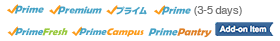

In [20]:
print(soup)

## Ma non è tutto...: capcha!

* Copiare l'HTML ricevuto e farlo interpretare da un interprete HTML
* 

<img src="Figures/Capcha2.jpg" style="width:600px;height:600px;"/>

## Assignment: Scraping di IMDB, Internet Movie Database

* è un sito web di proprietà di Amazon.com che gestisce informazioni su 
    * film
    * attori
    * registi
    * personale di produzione
    * programmi televisivi
    * videogiochi. 
* considerare la lista di episodi di **Game of Thrones**, che possono essere reperiti in https://www.imdb.com/title/tt0944947/episodes/
* per ogni episodio viene riportata una descrizione, la valutazione media
* gli episodi sono distribuiti su più pagine, per cui serve un processo di **crawling**
* produrre dei grafici che riportino statistiche legate agli episodi, as esempio un bar plor che riporti il rating medio di ogni episodio